## 데이터 불러오기

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


## 데이터 형태 확인

In [2]:
train_images.shape # 3차원 배열

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [5]:
test_images.shape # 3차원 배열

(10000, 28, 28)

In [6]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## 신경망 구조

In [7]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),    # 입력
    layers.Dense(10, activation="softmax") # 출력, 10이 의미하는 것은 예측할 범주의 개수
])


## 컴파일 단계
- 어떤 형태로 훈련을 시킬 것이냐를 정의
- 경사하강법 : 기울기를 찾는데, step을 어떤식으로 할 것인가 정의하는 것
- 경사하강법의 종류도 되게 많음

In [8]:
model.compile(optimizer = 'rmsprop',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])

## 이미지 데이터 준비
- 데이터를 모델에 맞는 크기로 변경
 + 주의! 이 때, 데이터타입 변경 ( 연산할 때, 데이터 타입 미 매칭으로 인한 오류 )
 + 기본값 : float64, 텐서플로 기본값 : float32

In [9]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255   # [0, 255] rescale
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255   # [0, 255] rescale

train_images.shape, test_images.shape

((60000, 784), (10000, 784))

In [38]:
60000/128

468.75

In [10]:
model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 7s 3ms/step - loss: 0.2616 - accuracy: 0.9257
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1059 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0692 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0503 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0366 - accuracy: 0.9891


In [11]:
test_digits = test_images[0:5]
predictions = model.predict(test_digits)
predictions[0].argmax()

1/1 [==============================] - 0s 65ms/step


7

In [12]:
predictions[0][7]

0.9999261

In [13]:
test_labels[0]

7

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("테스트 정확도", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0623 - accuracy: 0.9807
테스트 정확도 0.9807000160217285


## 기본문법

### 스칼라(랭크-0 텐서)

In [15]:
import numpy as np
x = np.array(12) # 스칼라 (값 1개)
x

array(12)

In [16]:
x.ndim

0

### 벡터(랭크-1 텐서)

In [17]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [19]:
x.shape, x.ndim # 1차원 배열 = 랭크-1 텐서 = 벡터

((5,), 1)

### 행렬(랭크-2 텐서)

In [21]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

x.shape, x.ndim # 2차원 배열 = 랭크-2 텐서 = 행렬

((3, 5), 2)

### 랭크-3 텐서와 더 높은 랭크의 텐서

In [22]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])

x.shape, x.ndim

((3, 3, 5), 3)

## 데이터 다시보기

In [23]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [24]:
train_images.ndim

3

In [25]:
train_images.shape

(60000, 28, 28)

In [26]:
train_images.dtype

dtype('uint8')

## 이미지 출력


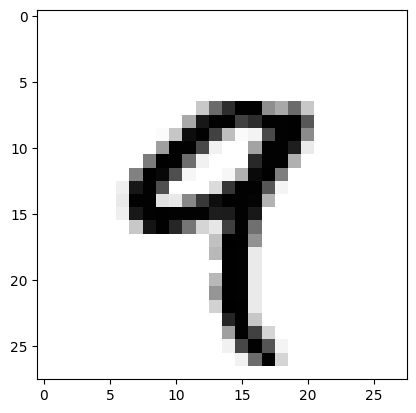

In [30]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

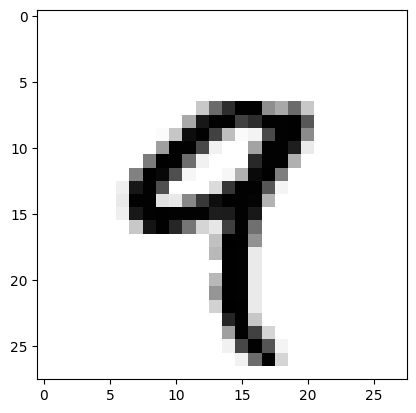

In [29]:
fig, ax = plt.subplots()
ax.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [31]:
train_labels[4]

9

## Numpy로 텐서 조작하기

In [32]:
my_slice = train_images[10:100] # 90개의 이미지를 가져옴
my_slice.shape

(90, 28, 28)

In [34]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [35]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [36]:
my_slice = train_images[:, 14:, 14:] # 오른쪽 아래
my_slice.shape

(60000, 14, 14)

In [37]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

## 배치 데이터
- 딥러닝 모델은 한 번에 전체 데이터셋을 처리하지 않는다!
- 대신 데이터를 작은 배치로 나눈다

In [ ]:
batch = train_images[:128] # 이미지 갯수를 나눔

## 텐서 연산


In [ ]:
# keras.layers.Dense(512, activation="relu")

In [39]:
# relu 함수 구현
def naive_relu(x): # 2차원 배열
  assert len(x.shape) == 2
  x = x.copy() # 입력 텐서 자체를 바꾸지 않고 복사한다.
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] = max(x[i, j], 0)
  return x

def naive_add(x, y):
  assert len(x.shape) == 2 # 2차원 배열
  assert x.shape == y.shape
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i, j]
  return x

- 원소별 연산

In [40]:
import time
x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
  z = x + y # 각각 원소별 덧셈
  z = np.maximum(z, 0.) # 원소별 렐루 함수
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 0.01 s


In [41]:
t0 = time.time()
for _ in range(1000):
  z = naive_add(x, y)
  z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 1.95 s


## 브로드캐스팅
- 참고 : https://numpy.org/doc/stable/user/basics.broadcasting.html

In [44]:
import numpy as np
X = np.random.random((32, 10)) # X는 크기가 32, 10인 행렬
y = np.random.random((10, )) # 1차원 벡터
y.shape, y.ndim

((10,), 1)

In [47]:
y = np.expand_dims(y, axis=0) # 2차원 행렬
y.shape, y.ndim

((1, 1, 10), 3)

In [48]:
Y = np.concatenate([y] * 32, axis = 0)
Y.shape, Y.ndim

((32, 1, 10), 3)

In [49]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [50]:
# p.79
import numpy as np
x = np.random.random((64, 3, 32, 10)) # 4차원
y = np.random.random((32, 10)) # 배열 다름 2차원
z = np.maximum(x, y) # 4차원

In [55]:
z.shape, x.shape, x.ndim, y.ndim

((64, 3, 32, 10), (64, 3, 32, 10), 4, 2)

## 텐서 곱셈

In [57]:
# 행렬곱셈 np.dot p.79
x = np.random.random((32, ))
y = np.random.random((32, ))
z = np.dot(x, y)
z

8.633352882708827

- 점곱 연산 함수를 만듬

In [58]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [59]:
naive_vector_dot(x, y)

8.633352882708827

- 행렬과 벡터를 행렬곱 하는 메서드를 만듬

In [62]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2 # 2차원 행렬
    assert len(y.shape) == 1 # 1차원 벡터
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

- 기존에 만든 함수를 재사용해서 표현

In [63]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

- 행렬곱 연산 함수를 구현함

In [64]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

- 텐서플로는 행렬곱 연산을 기반으로 한다!

In [68]:
x = np.random.random((64, 32))
y = np.random.random((32, 16))
z = np.random.random((16, 8))

result = naive_matrix_dot(x, y)
naive_matrix_dot(result, z)

array([[60.58143091, 67.22479646, 60.82804402, 51.16409472, 54.43508457,
        65.97895045, 50.54107645, 58.91170099],
       [70.99556184, 81.50028803, 72.03202489, 60.71837456, 63.54815759,
        79.43001792, 59.59438275, 70.54839393],
       [64.14879529, 75.2933411 , 66.24561033, 55.15592009, 58.51371578,
        72.8128391 , 54.6079653 , 64.69612867],
       [68.01139307, 77.83416258, 69.7282433 , 57.09575464, 62.0952015 ,
        76.63638436, 57.35978082, 67.0188326 ],
       [75.27323696, 85.72097215, 75.95177461, 63.84246998, 68.65501285,
        82.19807589, 63.1645736 , 74.25401762],
       [65.08917716, 75.05829137, 66.55338806, 54.90833702, 59.27216636,
        72.40702479, 54.71300043, 64.92737866],
       [76.34052027, 88.35236929, 77.71928524, 66.4190557 , 69.13670906,
        85.98585042, 64.8951882 , 77.17240389],
       [80.01384585, 91.92941004, 81.42600111, 68.34606978, 71.82436373,
        90.37735632, 67.24314609, 79.23905718],
       [76.10937663, 87.78613686

## 텐서 크기 변환

In [69]:
train_images = train_images.reshape((60000, 28 * 28))

In [70]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [73]:
x.reshape((2, 3))

array([[0., 1., 2.],
       [3., 4., 5.]])

In [77]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)